# Aviation Accidents Analysis

## Introduction
In this project, I have collected a dataset related to aviation accidents with the goal of gaining insights into the contributing factors of these incidents. The dataset includes information on various aspects, such as aircraft make and model, weather conditions, and the country where the accident occurred.

## Step 1: Data Loading 
### 1.1 Loading the Dataset

First, you need to load the dataset into a Pandas DataFrame. This dataset contains aviation accident data from 1962 to 2023.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [89]:

df = pd.read_csv('aviation_data.csv', encoding='latin1', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### 1.2 Inspecting Data-set

Next, we are inspecting data-set which is structure of the dataset.

In [90]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [92]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [93]:
df.shape

(88889, 31)

## Step 2: Data Cleaning

#### 2.1 Dropping Columns with High Missig Values

Here were we drop columns that have high missing values,
at a percentage of 30%

In [94]:
threshold = 0.3
missing_counts = df.isna().sum()
total_row = len(df)
drop_col = [i for i in df.columns if missing_counts[i] / total_row > threshold]
df.drop(columns=drop_col, inplace=True)
df.shape

(88889, 22)

### 2.2 Dropping Rows with Significant Missing Values

Here were we drop rows that have significant missing values

In [95]:
df2=df.copy()
df.drop('Publication.Date',axis=1,inplace=True)

In [96]:
d={}
for i in df.columns:
    d[i]=len(df[i].unique())
unique_values= pd.DataFrame(list(d.items()), columns=['Column', 'unique_val'])
unique_values["missing_values"]= df.isna().sum().values
unique_values

,Column,unique_val,missing_values
0,Event.Id,87951,0
1,Investigation.Type,2,0
2,Accident.Number,88863,0
3,Event.Date,14782,0
4,Location,27759,52
5,Country,220,226
6,Injury.Severity,110,1000
7,Aircraft.damage,5,3194
8,Registration.Number,79106,1317
9,Make,8238,63


In [97]:
subset_col = list(unique_values[unique_values['missing_values'] > 1000]['Column'])
df.dropna(subset=subset_col, inplace=True)
df.shape

(63325, 21)

### 2.3 Checking and dealing with null values

In [98]:
df.isna().sum()

Event.Id                    0
Investigation.Type          0
Accident.Number             0
Event.Date                  0
Location                   15
Country                   198
Injury.Severity            11
Aircraft.damage             0
Registration.Number         0
Make                        8
Model                      23
Amateur.Built               0
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
Report.Status               0
dtype: int64

In [99]:
l2 = ['Location', 'Country', 'Injury.Severity', 'Model', 'Make']
for i in l2:
    df[i].fillna(df[i].mode()[0], inplace=True)
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
dtype: int64

## Step 3: Data Standardization
### 3.1 Accident Trends Over Time

We'll Clean and Standardize text data.

In [100]:
obj_col = df.select_dtypes(include='object').columns
for i in obj_col:
    df[i] = df[i].str.strip()
    
df['Make'] = df['Make'].str.title()
df['Make'].replace('[!@#$%^&*()+{}|:"<>,.-?/\`~=:0123456789]', '', regex=True, inplace=True)
df['Make'] = df['Make'].str.strip()

df['Make']

0                  Stinson
1                    Piper
3                 Rockwell
6                   Cessna
7                   Cessna
               ...        
88639               Cessna
88647               Cessna
88661                Beech
88735    Stephen J Hoffman
88767             Luscombe
Name: Make, Length: 63325, dtype: object

### 3.2 Extracting relevant Parts of String Data

Further standardize the 'Make' and 'Model' columns by extracting relevant parts.

In [101]:
def str_clean(row):
    parts = row.split(" ", 2)
    if len(parts) > 1:
        return parts[0]
    else:
        return row
    
df['Make'] = df['Make'].apply(str_clean)
df['Model'] = df['Model'].apply(lambda x: x.upper())
df['Model'] = df['Model'].str.replace('-', ' ')
df['Model'] = df['Model'].apply(str_clean)

## Step 4: Data Analysis

### 4.1 Visualizing Top 10 Models by Make

Create visualizations for the top 10 aircraft makes and their top 10 models involved in accidents.

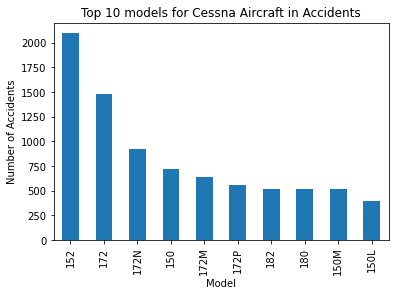

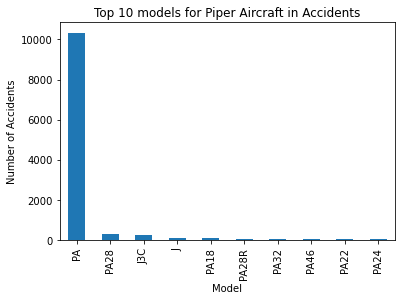

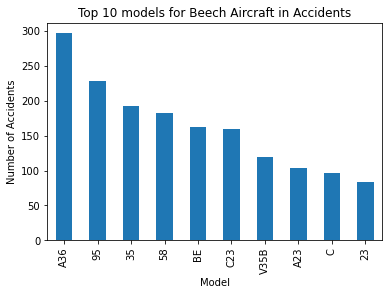

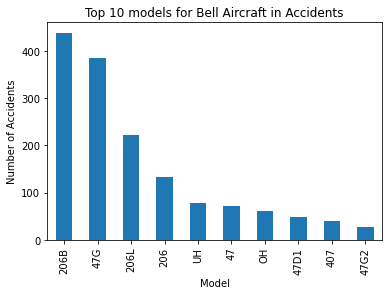

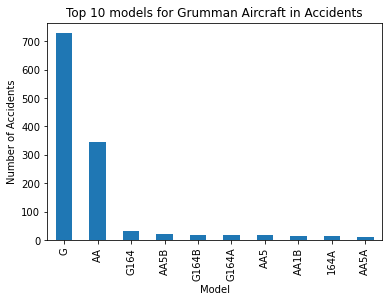

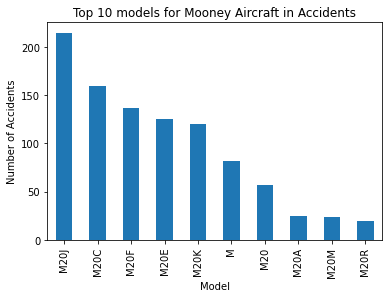

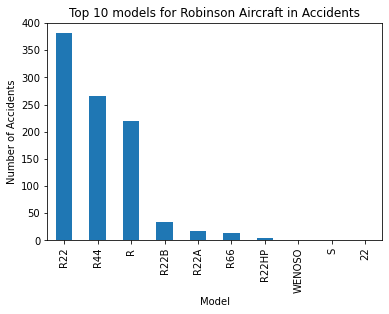

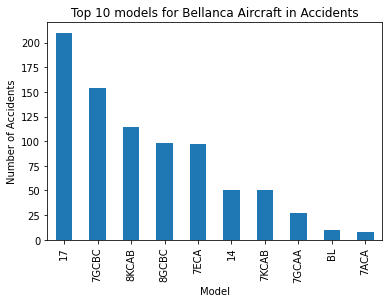

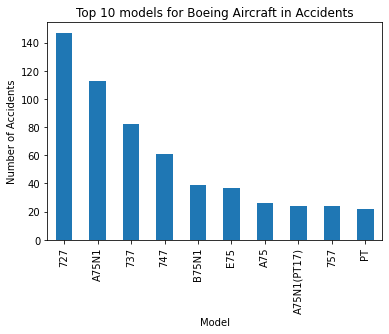

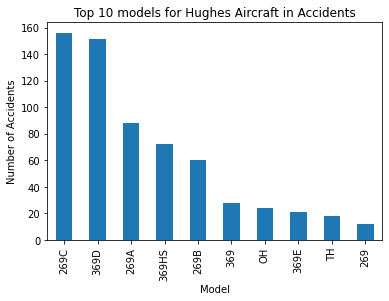

In [145]:
class AircraftAccidentVisualizer:
    def __init__(self, data):
        self.data = data 
    def visualize_top_10_models_by_make(self):
        top_10_makes = self.data['Make'].value_counts().head(10).index
        
        for make in top_10_makes:
            make_data = self.data[self.data['Make'] == make]
            top_10_models = make_data['Model'].value_counts().head(10)
            top_10_models.plot(kind='bar',title=f'Top 10 models for {make} Aircraft in Accidents')
            plt.xlabel('Model')
            plt.ylabel('Number of Accidents')
            plt.show()
            
    def visualize_weather(self):
        weather_counts = self.data['Weather.Condition'].value_counts()
        weather_counts.plot(kind='bar', title='Weather Conditions in Aircraft Accidents')
        plt.xlabel('Weather Conditions')
        plt.ylabel('Number of Accidents')
        plt.show()
        
    def visualize_engines(self):
        engine_weather_counts = self.data.groupby(['Engine.Type', 'Weather.Condition']).size().reset_index(name='Count')
        plt.figure(figsize=(20, 12))
        sns.barplot(x='Engine.Type', y='Count', hue='Weather.Condition', data=engine_weather_counts)
        plt.xlabel('Type of Eng.')
        plt.ylabel('Count of Engine')
        plt.title('Count of Engine Types by Weather Condition')
        plt.legend(title='Weather Codition', loc='upper right')
        plt.show()
       
            
visualizer = AircraftAccidentVisualizer(df)
visualizer.visualize_top_10_models_by_make()
            

### 4.2 Visualizing Weather Conditions in Accidents

Visualize the distribution of weather conditions during accidents.

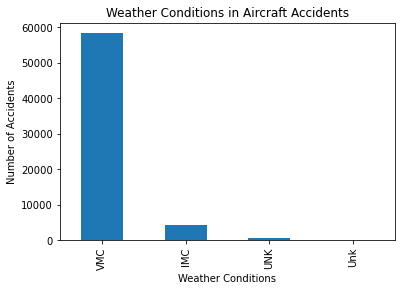

In [135]:
visualizer.visualize_weather()    

### 4.3 Visualizing Engine Types by Weather Condition

Visualize the relationship between engine types and weather conditions during accidents.

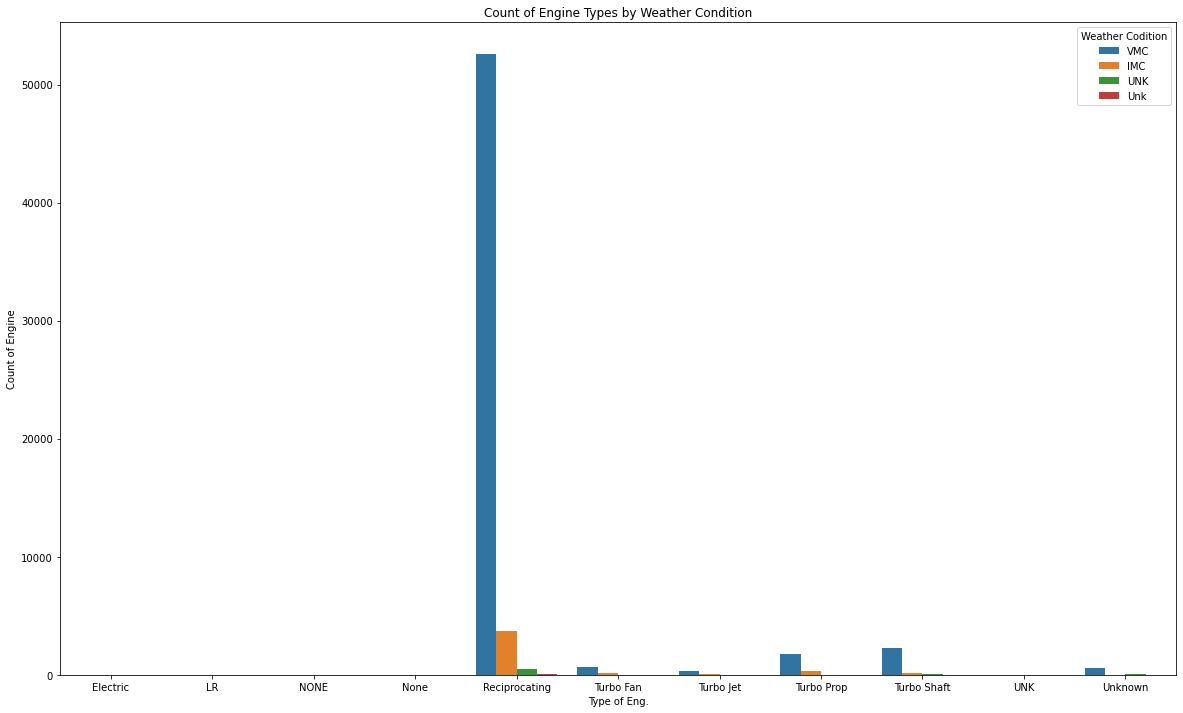

In [146]:
visualizer.visualize_engines()

## Step 5: Trend Analysis

### 5.1  Visualizing Trends Over Time
Analyze the trend of aviation accidents over time.



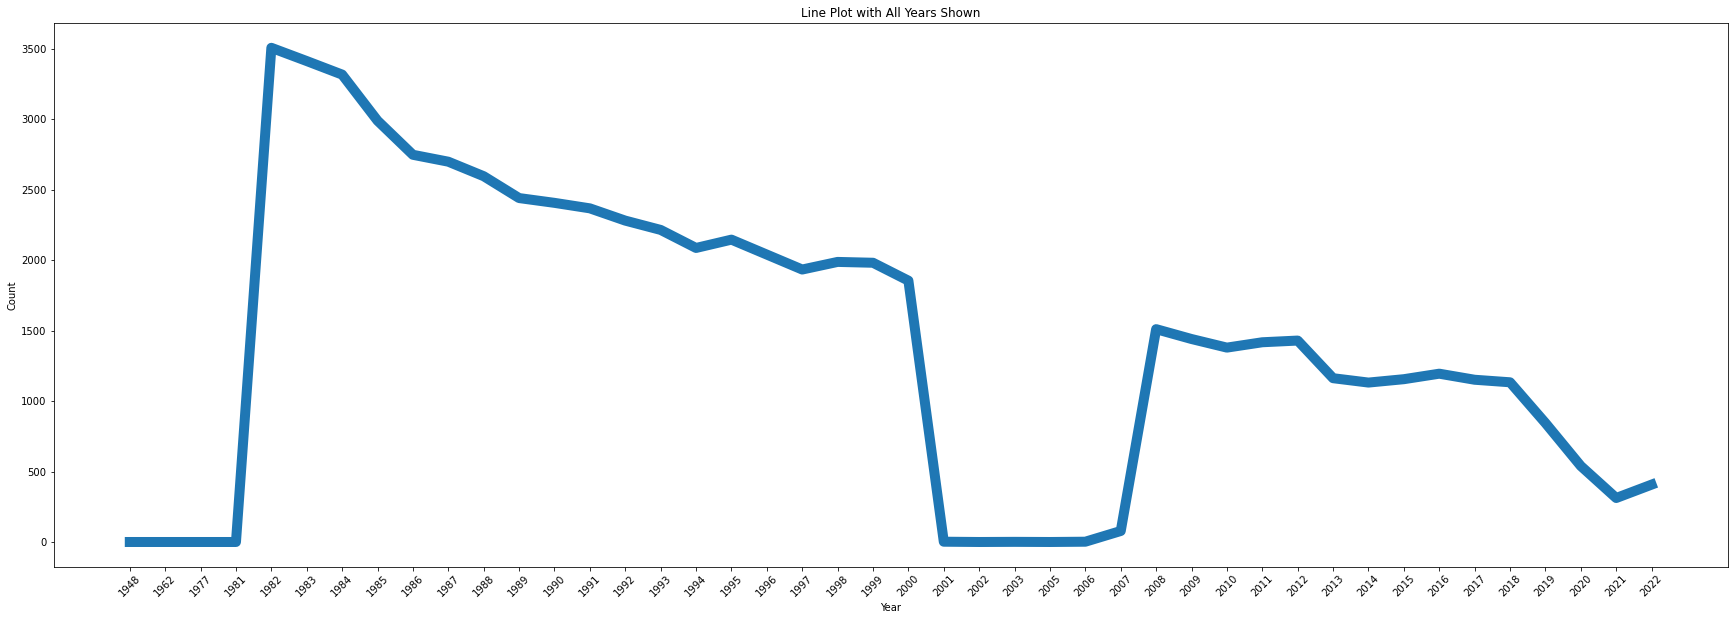

In [149]:
df["Event.Date"] = pd.to_datetime(df["Event.Date"])
df['year'] = df ["Event.Date"].dt.year
plt.figure(figsize=(30, 10))
year_data = df["year"].value_counts().sort_index()
x_ = year_data.index.astype(str)
y_ = year_data.values
sns.lineplot(x=x_, y=y_, sort=False, markers=True, linewidth=10)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Line Plot with All Years Shown')
plt.show()


## Step 6: Injury Analysis

### 6.1 Analyzing Injuries by Aircraft Make

Analyze the distribution of different types of injuries across the top 10 aircraft makes.


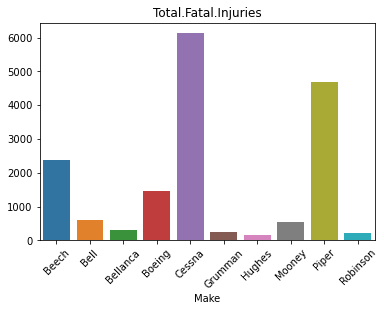

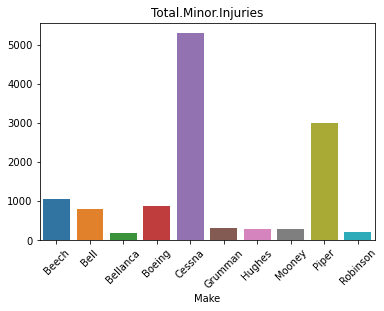

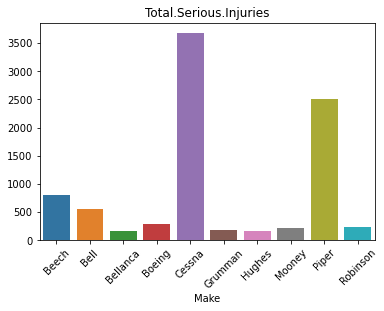

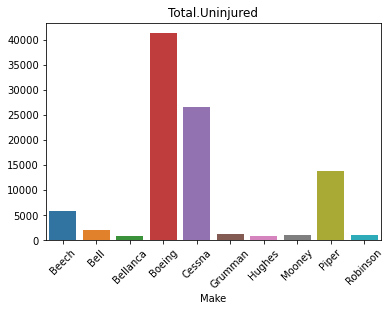

In [150]:
top10_model = df["Make"].value_counts().head(10)
injuries = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df_selected = df[['Make'] + injuries]
top_10_make_injuries = df_selected[df['Make'].isin(top10_model.index)]
inj_pivot = pd.pivot_table(top_10_make_injuries, values=injuries, columns='Make', aggfunc='sum')

for i in range(len(inj_pivot)):
    sns.barplot(x=inj_pivot.iloc[i].index, y=inj_pivot.iloc[i].values)
    plt.title(inj_pivot.index[i])
    plt.xticks(rotation=45)
    plt.show()
